In [1]:
# Import all important Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Collected Data from Kaggle website (https://www.kaggle.com/datasets/beekiran/sales-data-analysis)
# Load data using Pandas Library

In [3]:
df = pd.read_csv('Sales Data.csv.zip')

In [4]:
# Read the Data properly and find the null values

df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [6]:
# Check the Data type of all columns and remove unwanted columns

df['Order Date']= pd.to_datetime(df['Order Date'])

In [7]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [8]:
# Used Feature Engineering technique(Encoding) 

df.City.value_counts()

City
 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: count, dtype: int64

In [9]:
enc=pd.get_dummies(df['City'],dtype=int,drop_first=True)

In [10]:
df1=pd.concat([df,enc],axis = 1)
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,0,0,0,0,1,0,0,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,0,0,0,0,1,0,0,0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,0,0,0,0,1,0,0,0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,0,0,0,0,0,0,1,0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19,0,1,0,0,0,0,0,0
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19,0,0,0,0,1,0,0,0
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18,0,0,0,0,0,0,1,0
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18,0,0,0,0,0,0,1,0


In [11]:
# Drop the repeated column from Table

df1.drop(['City'],axis =1,inplace =True)

In [12]:
df1.describe()

,Order ID,Quantity Ordered,Price Each,Order Date,Month,Sales,Hour,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
count,185950.000000,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,185.490917,14.413305,0.053267,0.107201,0.079699,0.159209,0.133778,0.067034,0.240559,0.079226
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,185831.250000,1.000000,11.950000,2019-04-16 21:05:15,4.000000,11.950000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230367.500000,1.000000,14.950000,2019-07-17 20:40:30,7.000000,14.950000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,275035.750000,1.000000,150.000000,2019-10-26 08:14:00,10.000000,150.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,3400.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,51512.737110,0.442793,332.731330,NaN,3.502996,332.919771,5.423416,0.224566,0.309369,0.270827,0.365872,0.340414,0.250082,0.427424,0.270091


In [13]:
# Describe the independent and dependent columns

x=df1.drop(['Product','Order Date','Purchase Address','Price Each'],axis = 1)

In [14]:
x

,Order ID,Quantity Ordered,Month,Sales,Hour,Austin,Boston,Dallas,Los Angeles,New York City,Portland,San Francisco,Seattle
0,295665,1,12,1700.00,0,0,0,0,0,1,0,0,0
1,295666,1,12,600.00,7,0,0,0,0,1,0,0,0
2,295667,1,12,11.95,18,0,0,0,0,1,0,0,0
3,295668,1,12,149.99,15,0,0,0,0,0,0,1,0
4,295669,1,12,11.95,12,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,1,6,2.99,19,0,1,0,0,0,0,0,0
185946,222906,1,6,149.99,19,0,0,0,0,1,0,0,0
185947,222907,1,6,11.95,18,0,0,0,0,0,0,1,0
185948,222908,1,6,11.95,18,0,0,0,0,0,0,1,0


In [15]:
y = df1['Price Each']

In [16]:
y

0         1700.00
1          600.00
2           11.95
3          149.99
4           11.95
           ...   
185945       2.99
185946     149.99
185947      11.95
185948      11.95
185949       2.99
Name: Price Each, Length: 185950, dtype: float64

In [17]:
# Train & Test the model

from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=42)

In [19]:
y_test

75632      14.95
30255       2.99
86718     150.00
167590     14.95
41197     700.00
           ...  
111602    150.00
97575      11.99
141759    400.00
153296     99.99
96380     149.99
Name: Price Each, Length: 46488, dtype: float64

In [20]:
# Apply the Algorithm

from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = reg.predict(x_test)

In [29]:
# Check the accuracy of model

from sklearn.metrics import mean_absolute_error,r2_score

In [30]:
mae=mean_absolute_error(y_test,y_pred)
print('Mean_absolute_error:',mae)

Mean_absolute_error: 1.3280132310879222


In [31]:
r2_score = r2_score(y_test,y_pred)
print('R2_score:',r2_score)                   # 99% model predict accurate

R2_score: 0.998861162871973


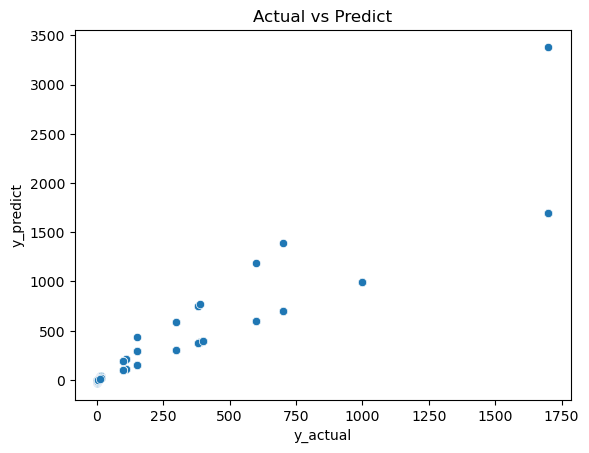

In [27]:
# Plot the scatterplot 

sns.scatterplot(x= y_test, y= y_pred)
plt.title('Actual vs Predict')
plt.xlabel('y_actual')
plt.ylabel('y_predict')
plt.show()